In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Polynomial%20Regression/car%20data.csv"

--2024-12-10 14:59:44--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Polynomial%20Regression/car%20data.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16908 (17K) [text/plain]
Saving to: ‘car data.csv’

car data.csv        100%[===================>]  16.51K  --.-KB/s    in 0s      

2024-12-10 14:59:44 (45.8 MB/s) - ‘car data.csv’ saved [16908/16908]



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df['Car_Age'] = 2024-df['Year']

In [6]:
df = df.drop(['Year','Car_Name'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Driven_kms     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Selling_type   301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Car_Age        301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,10.372093
std,5.082812,8.642584,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,6.000000
25%,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,6.000000,9.900000,48767.000000,0.000000,12.000000
max,35.000000,92.600000,500000.000000,3.000000,21.000000


In [9]:
categories = df.columns[df.dtypes == 'object']

In [10]:
for i in categories:
  print(i)

Fuel_Type
Selling_type
Transmission


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in categories:
  df[col] = encoder.fit_transform(df[col])

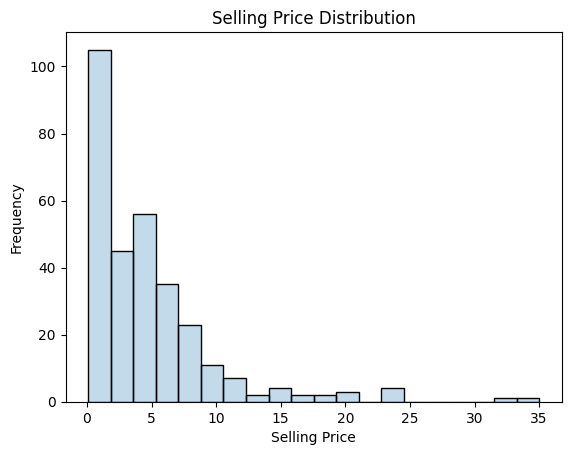

In [12]:
sns.histplot(df['Selling_Price'], bins = 20, edgecolor = 'black', alpha = 0.27)
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
df['Selling_Price'].skew()

2.493422417797524

In [14]:
correlation_matrix = df.corr()

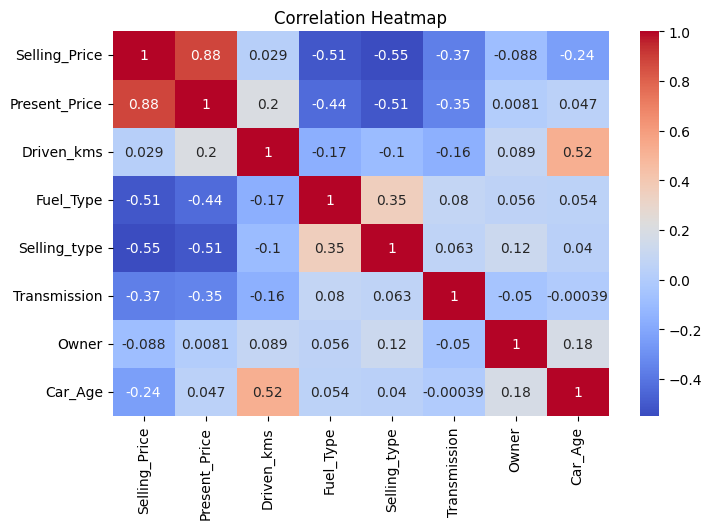

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df['Selling_Price'] = np.log1p(df['Selling_Price'])

In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
y = df['Selling_Price']
X = df.drop(['Selling_Price'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [22]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_poly)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.01538540705664156
R2 Score: 0.9748043031582908


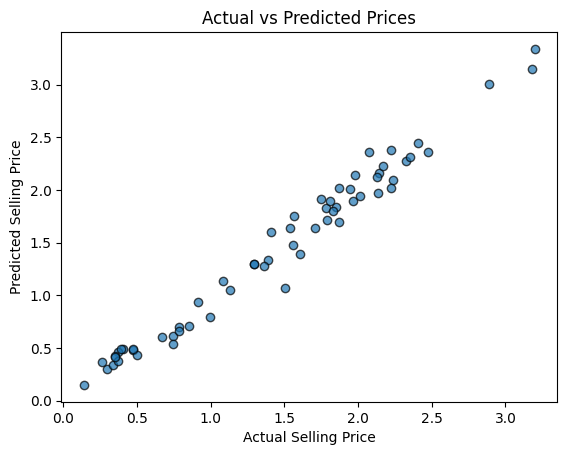

In [26]:
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Prices')
plt.show()

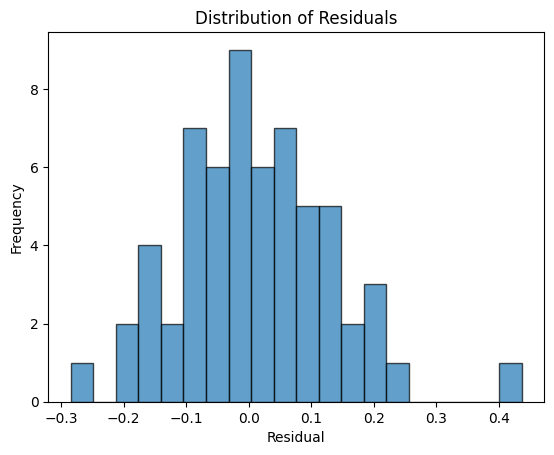

In [27]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()